# Problem 1

In [ ]:
import numpy as np
import math as m
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
def evaluate(method, fn, y_ini, xs, h): # Evaluating the x values corresponding to every t values with different methods.
    ys = np.zeros_like(xs)
    y = y_ini
    for i in range(len(xs)):
        x = xs[i]
        ys[i] = y
        y = method(fn, x, y, h)
    return ys

In [ ]:
def eule(f1, x, y, h): # Euler Method
    return y + h*f1(x,y);

def midpoint(f1, x, y, h): # Midpoint Method
    k1 = h*f1(x, y)
    return y + h*f1(x+h/2, y+k1/2)


In [ ]:
def f1(x,t):
    return -x*t

# Part (a) of question 1
# $t_{initial} = 0, t_{final} = 1, h =0.01 $
# Initial conditions are: $x(0) =1 $
# $ \frac{dx}{dt} = -xt$
# Using initial conditions we have exact solution of this problem,
# $ ⇒ x(t) = e^{-\frac{t^2}{2}} $




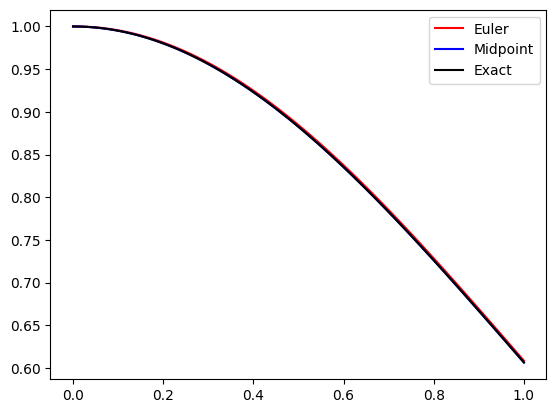

In [ ]:
# Initial Conditions
t_in= 0 # t is from 0 to 1
t_fin= 1
h=0.01 # step size is 0.01

x_int= 1.0 # Initial value of x at t=0 = 1.0
ts = np.arange(t_in,t_fin+h,h) # t is from 0 to 1

eu=evaluate(eule,f1,x_int,ts,h) # Evaluating the ode from 0 to 1
midpoints = evaluate(midpoint,f1,x_int,ts,h)

plt.plot(ts,eu,color='red')
plt.plot(ts,midpoints,color='blue')

z = np.exp(-((ts)**2)/2) # exact value function
plt.plot(ts,z,color='black')

plt.legend(["Euler","Midpoint","Exact"])



# Part (b) of question 1


In [ ]:
t_in= 0
t_fin= 1
x_int= 1.0

x_end =0.6065306597126334 # at t_final, x(t_final) = exp(-1/2)
n = np.arange(-4,-2+0.2,0.2)
h = np.power(10, n)

eu_error = []
mid_error=[]

for i in range(len(n)): # Evaluating errors from exact values for different methods.
    ts = np.arange(t_in,t_fin+h[i],h[i])

    eur= evaluate(eule,f1,x_int,ts,h[i])
    eu_error.append(abs(x_end-eur[-2]))

    mid= evaluate(midpoint,f1,x_int,ts,h[i])
    mid_error.append(abs(x_end-mid[-2]))

Matrix = np.array([n,h,eu_error,mid_error])
Matrix = np.transpose(Matrix)
# print(Matrix) # If you want to see the table with more after decimal places, uncomment this line

headers = ['n','h','Euler Error','Midpoint Error']
table = tabulate(Matrix,headers,tablefmt='pipe',floatfmt=('.1f', '.6f', '.6f', '.10f'))
print(f'Exact value: {x_end}')
print(table)

Exact value: 0.6065306597126334
|    n |        h |   Euler Error |   Midpoint Error |
|-----:|---------:|--------------:|-----------------:|
| -4.0 | 0.000100 |      0.000081 |     0.0000606526 |
| -3.8 | 0.000158 |      0.000087 |     0.0000551232 |
| -3.6 | 0.000251 |      0.000062 |     0.0000109214 |
| -3.4 | 0.000398 |      0.000295 |     0.0002140335 |
| -3.2 | 0.000631 |      0.000470 |     0.0003418001 |
| -3.0 | 0.001000 |      0.000809 |     0.0006064799 |
| -2.8 | 0.001585 |      0.001242 |     0.0009201543 |
| -2.6 | 0.002512 |      0.000672 |     0.0001629587 |
| -2.4 | 0.003981 |      0.001263 |     0.0004547023 |
| -2.2 | 0.006310 |      0.003158 |     0.0018705732 |
| -2.0 | 0.010000 |      0.008120 |     0.0060600155 |


#  Part (c) of question 1


Slope of fitting of Euler method: 0.968935186729392
Slope of fitting of Midpoint method: 0.9623777394052841


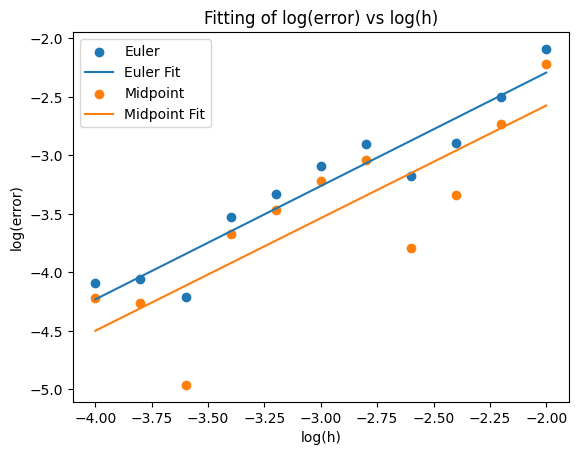

In [210]:
def eq_fit(x,p0,p1):
    return p0*x+p1

#Defining the function for fitting
logh= np.log10(h)
logeu_error= np.log10(eu_error)
logmid_error= np.log10(mid_error)

param1, cov1=curve_fit(eq_fit,logh, logeu_error, p0=[1.0,1.0]) # Fitting the euler method
plt.scatter(logh, logeu_error,label="Linear")
plt.plot(logh,eq_fit(logh,param1[0],param1[1]),label="Linear_fit")

param2, cov2=curve_fit(eq_fit,logh, logmid_error, p0=[1.0,1.0]) # Fitting the Midpoint method
plt.scatter(logh, logmid_error,label="Linear")
plt.plot(logh,eq_fit(logh,param2[0],param2[1]),label="Linear_fit")

plt.legend(["Euler","Euler Fit","Midpoint","Midpoint Fit"])
plt.title("Fitting of log(error) vs log(h)")
plt.xlabel('log(h)')
plt.ylabel('log(error)')

print(f"Slope of fitting of Euler method: {param1[0]}")
print(f"Slope of fitting of Midpoint method: {param2[0]}")


# plt.ylim(-6,-1)
# plt.xlim(-10,-4)

# Problem 2

In [213]:
def euleer(x_ini, p_ini, ts, h): # Defining euler method for couple equations.
    ps = np.zeros_like(ts)
    p = p_ini
    xs = np.zeros_like(ts)
    x = x_ini

    for i in range(len(ts)):
        t=ts[i]
        xs[i] =x
        ps[i] = p

        x = x + p*h   # Couple equations
        p = p-4*np.pi**2*h*x

    return (xs,ps)

def midpooint(y_ini, p_ini, ts, h): # Defining Midpoint method for couple equations.
    ps = np.zeros_like(ts)
    p = p_ini
    ys = np.zeros_like(ts)
    y = y_ini

    for i in range(len(ts)):
        t = ts[i]
        ys[i] = y
        ps[i] = p

        k1y = h * p       # k1 and k2 for Midpoint method
        k1p = -h * 4*np.pi**2*y

        k2y = h * (p + k1p/2)
        k2p = -h *4*np.pi**2* (y + k1y/2)

        y = y + k2y
        p = p + k2p
    return (ys,ps)

# $t_{initial} = 0, t_{final} = 1, h =0.01 $
# Initial conditions are: $y(0) =1, p(0) = 0 $
# $ \frac{dy}{dt} = p, \frac{dp}{dt} = -4\pi^2y$
# Then, $\frac{d^2y}{dt^2} + 4\pi^2y =0$
# Using initial conditions we have exact solution of this problem,
# $ ⇒ y(t) = cos(2\pi t) $ and $ p(t) = -2\pi sin(2\pi t) $


# Part (a) of the question 2


I have plotted y vs t and p vs t for different methods.



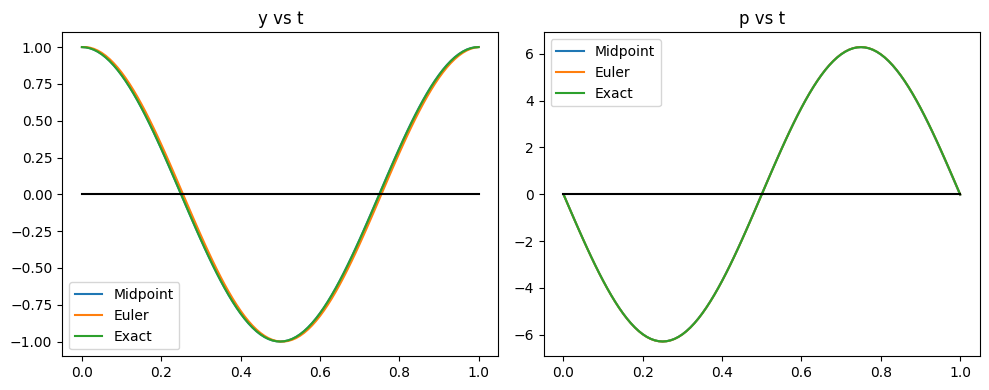

In [214]:
# Initial Conditions
t_in= 0
t_fin= 1
h=0.01 # step size

x_int= 1.0
p_int= 0.0
ts = np.arange(t_in,t_fin+h,h) # t is from 0 to 1

# Couple Equations solve where i get arrays for y
g = midpooint(x_int,p_int,ts,h)
l = euleer(x_int,p_int,ts,h)

y = np.cos(2*m.pi*ts)
z = -2*m.pi*np.sin(2*m.pi*ts)

print("I have plotted y vs t and p vs t for different methods.\n")


fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot
axs[0].plot(ts, g[0], label='Midpoint')
axs[0].plot(ts, l[0], label='Euler')
axs[0].plot(ts,y,label='Exact') # Exact
axs[0].plot(ts,np.zeros(ts.size),color='black')

axs[0].set_title('y vs t')
axs[0].legend()

# Plot the second subplot
axs[1].plot(ts, g[1], label='Midpoint')
axs[1].plot(ts, l[1], label='Euler')
axs[1].plot(ts,z,label='Exact') # Exact
axs[1].plot(ts,np.zeros(ts.size),color='black')
axs[1].set_title('p vs t')
axs[1].legend()

plt.tight_layout()
plt.show()





# Part (b) of question 2

In [215]:
# Initial Conditions are same like before. just h is changing.
t_in= 0
t_fin= 1
x_int= 1.0
p_int=0.0

# End values of x and p
x_end =np.cos(2*m.pi*t_fin)
p_end = -2*m.pi*np.sin(2*m.pi*t_fin)

n = np.arange(-4,-2+0.2,0.2) # Dividing n from -4 to -2 by 0.2 values
h = np.power(10, n)

eu_errorx = []
eu_errorp= []

mid_errorx=[]
mid_errorp=[]

for i in range(len(n)): # Evaluating errors from exact values for different methods.
    ts = np.arange(t_in,t_fin+h[i],h[i])

    eur= euleer(x_int,p_int,ts,h[i])
    eu_errorx.append(abs(x_end-eur[0][-1])) # eur[0] is value of y array for h[i] and given initial conditions
    eu_errorp.append(abs(p_end-eur[1][-1])) # eur[1] is value of p array for h[i] and given initial conditions


    mid= midpooint(x_int,p_int,ts,h[i])
    mid_errorx.append(abs(x_end-mid[0][-1]))# same like before
    mid_errorp.append(abs(p_end-mid[1][-1]))


xmat = np.array([n,h,eu_errorx,mid_errorx])
pmat = np.array([n,h,eu_errorp,mid_errorp])

xmat = np.transpose(xmat)
pmat = np.transpose(pmat)

# Table Printing
headers = ['n','h','Euler Error','Midpoint Error']
table = tabulate(xmat,headers,tablefmt='pipe',floatfmt=('.1f', '.6f', '.10f', '.10f'))
print(f'Exact value: {x_end}')
print("Estimation of error of y")
print(table)

headers = ['n','h','Euler Error','Midpoint Error']
table = tabulate(pmat,headers,tablefmt='pipe',floatfmt=('.1f', '.6f', '.10f', '.10f'))
print(f'Exact value: {p_end}')
print("Estimation of error of p")
print(table)


Exact value: 1.0
Estimation of error of y
|    n |        h |   Euler Error |   Midpoint Error |
|-----:|---------:|--------------:|-----------------:|
| -4.0 | 0.000100 |  0.0000000000 |     0.0000000002 |
| -3.8 | 0.000158 |  0.0000001213 |     0.0000000899 |
| -3.6 | 0.000251 |  0.0000000825 |     0.0000010740 |
| -3.4 | 0.000398 |  0.0000003165 |     0.0000000299 |
| -3.2 | 0.000631 |  0.0000007561 |     0.0000000478 |
| -3.0 | 0.001000 |  0.0000000324 |     0.0000001940 |
| -2.8 | 0.001585 |  0.0000021427 |     0.0000006359 |
| -2.6 | 0.002512 |  0.0000115112 |     0.0000999029 |
| -2.4 | 0.003981 |  0.0000465991 |     0.0002071630 |
| -2.2 | 0.006310 |  0.0001961673 |     0.0001906226 |
| -2.0 | 0.010000 |  0.0000319656 |     0.0001863097 |
Exact value: 1.5389365549774318e-15
Estimation of error of p
|    n |        h |   Euler Error |   Midpoint Error |
|-----:|---------:|--------------:|-----------------:|
| -4.0 | 0.000100 |  0.0000006494 |     0.0000025976 |
| -3.8 | 0.000158

# Part (c) of question 2
# For y, Fitting:

Slope of fitting of euler method: 2.4832536782968484
Slope of fitting of Midpoint method: 2.647112839281907


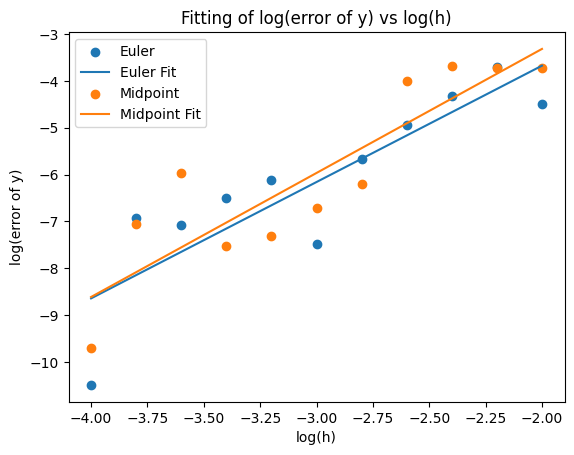

In [212]:
def eq_fit(x,p0,p1):
    return p0*x+p1

#Defining the function for fitting
logh= np.log10(h)
logeu_error= np.log10(eu_errorx)
logmid_error= np.log10(mid_errorx)

param1, cov1=curve_fit(eq_fit,logh, logeu_error, p0=[1.0,1.0])
param2, cov2=curve_fit(eq_fit,logh, logmid_error, p0=[2.0,2.0])

# Plotting
plt.scatter(logh, logeu_error,label="Linear")
plt.plot(logh,eq_fit(logh,param1[0],param1[1]),label="Linear_fit")

plt.scatter(logh, logmid_error,label="Linear")
plt.plot(logh,eq_fit(logh,param2[0],param2[1]),label="Linear_fit")

plt.legend(["Euler","Euler Fit","Midpoint","Midpoint Fit"])
plt.title("Fitting of log(error of y) vs log(h)")
plt.xlabel('log(h)')
plt.ylabel('log(error of y)')
print(f"Slope of fitting of euler method: {param1[0]}")
print(f"Slope of fitting of Midpoint method: {param2[0]}")




#For p, Fitting:

Slope of fitting of Euler method: 1.5271119888841662
Slope of fitting of Midpoint method: 1.5351378980842705


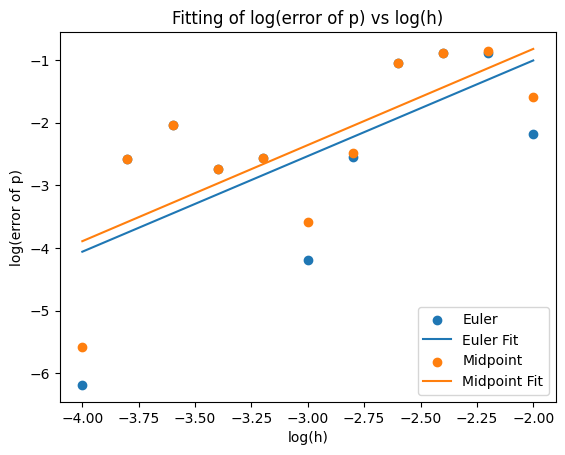

In [208]:
def eq_fit(x,p0,p1):
    return p0*x+p1

#Defining the function for fitting
logh= np.log10(h)
logeu_errorp= np.log10(eu_errorp)
logmid_errorp= np.log10(mid_errorp)

# Fitting Parameters
param1, cov1 = curve_fit(eq_fit, logh, logeu_errorp, p0=[1.0, 1.0])
param2, cov2 = curve_fit(eq_fit, logh, logmid_errorp, p0=[1.0, 1.0])

# Plotting
plt.scatter(logh, logeu_errorp, label="Euler")
plt.plot(logh, eq_fit(logh, param1[0], param1[1]), label="Euler Fit")

plt.scatter(logh, logmid_errorp, label="Midpoint")
plt.plot(logh, eq_fit(logh, param2[0], param2[1]), label="Midpoint Fit")

plt.legend()
plt.title("Fitting of log(error of p) vs log(h)")
plt.xlabel('log(h)')
plt.ylabel('log(error of p)')

print(f"Slope of fitting of Euler method: {param1[0]}")
print(f"Slope of fitting of Midpoint method: {param2[0]}")

plt.show()
